## 2.6.1基本概率论

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs=torch.ones([6])/6
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [3]:
multinomial.Multinomial(10,fair_probs).sample()

tensor([1., 2., 2., 0., 4., 1.])

In [4]:
# 将结果存储为32位浮点数以进行除法
counts=multinomial.Multinomial(1000,fair_probs).sample()
counts/1000   # 相对频率作为估计值

tensor([0.2000, 0.1500, 0.1580, 0.1640, 0.1570, 0.1710])

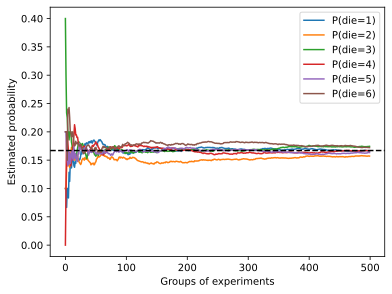

In [5]:
counts=multinomial.Multinomial(10,fair_probs).sample((500,))
cum_counts=counts.cumsum(dim=0)
estimates=cum_counts/cum_counts.sum(dim=1,keepdim=True)
d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),label=("P(die=" + str(i+1) + ")"))
d2l.plt.axhline(y=0.167,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()